# Validação do protocolo de Docking para a SARS-CoV-2 (COVID-19), Main Protease.

<b>Running title: Performance Evaluation of Empirical Scoring functions known ligands of SARS-CoV-2 Mprot (3CL).</b>

<b>Dois artigos fundamentais da SARS-CoV-2 Mprot:</b>
https://pubs.acs.org/doi/10.1021/acs.jmedchem.9b01828
https://science.sciencemag.org/content/early/2020/03/19/science.abb3405

## Algumas notas

A pandemia de coronavírus de 2019 (SARS-CoV-2, COVID-19) nos motiva a buscar por novas entidades farmacêuticas para atuar como compostos moduladores da infecção causada pelo novo SARS-CoV-2.

O genoma do COVID-19 revelou proteínas importantes que tem sido alvo de estudos de reposicionamento de fármacos. Dentre eles se destaca da Main Protease (Mpro, 3CL), uma cisteína proteinase com o papel de clivar a poliproteína do COVID-19 nas demais proteínas constituintes do virús, num processo similar ao da HIV-1 protease, na qual os inibidores de protease (ritonavir, indinavir, lopinavir) tem papel fundamental no controle da doença.

A busca por informações sobre a estrutura das proteínas do COVID-19 está a todo vapor. Para a Mpro já existem 12 (24/03/2020) estruturas 3D determinadas por cristalografia de difração de raios X, elas se dividem em estruturas apo (sem ligante) e em complex com fragmentos, ou inibidores. O grupo do prof. Hilgenfeld está mais avançado na busca por novos candidatos e publicou dois estudos recentes (links acima) sobre a exploração do sítio da Mpro com alpha-cetoaminas, uma classe de inibidores "suicidas", que formam ligação covalente com a cisteína catalítica. Nestes trabalhos produziu uma série de compostos e documentou o IC50 de pelo menos 11 deles, o que nos ajuda muito a validar qualquer modelo computacional que prevê a potência do composto (função de pontuação, energia de interação, dG... o que for).

> <b>Pausa para um lembrete</b>:  A procura efetiva de novos compostos contra proteínas-alvo depende largamente de 4 capacidades básicas nas campanhas de triagem virtual. Docking Power, capacidade de reproduzir a estrutura tridimensional determinada experimentalmente, o  Screening Power, capacidade de “separar o joio do trigo”, identificando moléculas bioativas. Ranking Power, capacidade de classificar as moléculas bioativas quanto a potência. Scoring Power, capacidade de classificar qual a pose de docking, dentre as possíveis é a melhor. Esses "powers" são investigados todos os anos dentre as diversas técnicas nas "competições" CASF, D3R, e SAMPL.

Os modelos de previsão empíricos (scoring function), muito usados no docking molecular são bons para reproduzir pose de cristais (Docking Power) e excelentes para separar os compostos ativos dos inativos (Screening Power) (um dataset de treinamento é o DUD-E) porém são genéricos, e precisam/podem ser treinados para terem melhor capacidade preditiva em enzimas específicas, além disso eles pecam em algumas classes de enzimas/substratos quando existe flexibilidade no sítio, um exemplo clássico é a HIV-1 protease. 

Anyway, dentre as funções de pontuação empíricas, as baseadas em Machine Learning estão no topo da lista de qualidade, alcançando a maior correlação com os dados experimentais, são elas o DeltaVinaXGB que usa um modelo de aprendizado treinado com o "gradient boost", e obtém a variação de entropia com análise conformacional, ele é caro por conta da entropia, o outro que se destaca é Deep Learn Score (DLSCORE) que é bem mais rápido. 

Já os métodos de estimativa da energia livre baseados em física, são mais caros e robustos como MM/PBSA e FEP exigem muita, mas muita expertise para reproduzir valores absolutos de energia livre experimental (Scoring Power), no entanto se destacam na classificação de séries de ligantes (Ranking Power), pois apenas a "diferença" de energia livre de ligação entre os compostos (mais fácil de calcular) é suficiente para classifica-los.

Numa das linhas de ataque do consórcio UFJF / UFRJ / UNISTRA estamos correndo a triagem virtual com os bancos de dados: NuBBe (>2mil), NatProdDB (~2mil), LASSBIO/LADMOL (~2mil), Chimiothèque du CNRS (~75mil), e ZINC (7 milhões, em andamento).

Todos os compostos foram avaliados com as funções Vina, ChemPLP, MMGBSA (em andamento) e DLSCORE e a triagem resultou numa série de compostos promissores e com parâmetros físico-químicos drug-like. A caracterização das interações e comparações com os inibidores conhecidos está em andamento, por inspeção visual e comparação dos Structural Interaction Fingerprints para montarmos a lista final. Além disso temos em andamento, as simulações de DM de 200ns para 10 os melhores complexos (do deep learn score)

Finalmente, estamos em busca ativa de colaboradores para os ensaios experimentais. Eventualmente termos que colabora com o grupo da Alemanha, pois no Brasil está difícil arranjar alguém.
    
Agora chego ao ponto.
    Tudo isso é em vão se não tivermos o feedback dos ensaios experimentais, temos algumas partes do trabalho em aberto que são extremamente relevantes. 
   Um ponto importante é que a Mpro do SARS-CoV-1 é bem parecida com a do COVID-19, com uma diferença importante no volume do subsídio S2, explorada nos artigos citados.
    Validação do Screening Power.
A Mpro do SARS-CoV-1 possui alguns High Throughput Screening publicados no PubChem Bioassay, dentre os quais, um do Scrips Research institute com ~300mil compostos testados contra a SARS-CoV-1, no qual identificaram ~40 ativos.
Além disso um HTS de validação com um número menor de compostos validando esses compostos.
Apesar do desequilíbrio no número de ativos e inativos avaliar a capacidade de "separar o joio do trigo" é fundamental para gerenciar nossas expectativas e saber o quanto podemos confiar no resultado do Virtual Screening.
Validação do Scoring/Ranking Power (SARS-CoV-1)
A epidemia do SARS-CoV-1 também gerou ensaios mais específicos para a Mpro, então precisa de alguém para coletar esses dados e realizar o virtual screening para sabermos as limitações das estratégias de virtual screening para essa classe de enzimas.
A pergunta fundamental é: qual função de pontuação/free energy consegue me dar os melhores compostos já documentados. 
Validação do Scoring/Ranking Power (SARS-CoV-2)
Temos pouquíssimos compostos testados contra a Mpro deste vírus, número insuficiente para validar um modelo de predição. No entanto precisamos trabalhar com o que temos e manejar as expectativas quanto aos resultados.
O trabalho é de coletar os dados de IC 50 do artigo 10.1021/acs.jmedchem.9b01828, realizar o docking "template-based" com os cristais disponíveis e testar as diferentes funções de pontuação.
Proposta de novos ligantes para Mpro de SARS-CoV-2. (Uma vez que a função de Scoring/Ranking está validada)
Substituir a alpha-cetoamida por outros grupos suicidas tradicionalmente usados contra cisteína proteases como a vinyl sulfona ou epóxi.


 
Extras: 
Conheça um pouco mais sobre as métricas de avaliação nesta publicação do CASF.
[1] Li, Y., Su, M., Liu, Z. et al. Assessing protein–ligand interaction scoring functions with the CASF-2013 benchmark. Nat Protoc 13, 666–680 (2018). https://doi.org/10.1038/nprot.2017.114
 
Tarefas: 
A estrutura bioativa SARS-CoV-2 Main Protease é um homodímero. As duas cadeias têm participação nos dois sítios ativos.
1.    Baixar e preparar a estrutura bioativa com o Maestro Academic todos os cristais da SARS-CoV-2 Main Protease do grupo do prof. Rolf Hilgenfeld*. (6LU7, ... )
a.    Colocar em arquivos separados:
                                               i.     bioactive.pdb/.mol2: Estrutura bioativa, contendo as duas cadeias da proteína, os dois ligantes e as moléculas de água. Remover íons outras moléculas que vierem no cristal.
                                             ii.     protein.pdb/mol2: Estrutura da proteína (ambas cadeias)
                                            iii.     chain_A.pdb/mol2 e chain_B.pdb/mol2: Estrutura das cadeias A e B da proteína.
                                            iv.     ligand_A.pdb/mol2 e ligand_B.pdb/mol2: Estrutura das cadeias A e B da proteína.
                                              v.     water.pdb: Moléculas de água cristalográficas.

## Experimentos:

### objetivos: Encontrar a combinação ideal entre o software e parâmetros.

#### Objetivos específicos: Perguntas para responder.
* Qual protocolo produz as melhores estruturas ? (RMSD)
Qvina com exaustividade 32 e energy range 3 mostrou o melhor resultado. O tempo de execução total para todos os ligantes no computador do Caio levou ~20 minutos. (32 experimentos em 4 processadores i3 M380 ) 

    * Existe diferença de qualidade entre os resultados do ligante A para o ligante B ???
    Sim. O sítio do ligante A parece ser mais amplo, possibilitanto mais conformações do ligante (veja Violin plot), os resultados para o ligante B são mais consistentes. Na média das distribuições de resultado dá no mesmo, com diferença de rmsd <0.5Å. 

* Para cada protocolo, qual é a frequencia de estruturas boas, médias, e ruins, de acordo com o RMSD.
     Estruturas médias e boas (<2.0Å) 
     Global, todos os 72 experimentos (cadeia A e B): Vina: ~20%, QuickVina: 7%, global
     Por exhaustiveness (cadeia A e B): 
         8 : Vina: 8% , QuickVina: 0%
         24: Vina: 20%, QuickVina: 4%
         32: Vina: 29%, QuickVina: 16.6%
     * Qual programa tem a maior proporcao de resultados bons ?
     Vina.

* Qual é a correlação entre o RMSD e a Energia ?
    * Calcule a correlacao de Pearson (r) e a de Spearmam (r) e o R^2
    É horrível. Caio vai rodar o DLScore para ver se melhora.
   
* O numero de replicas das simulações influencia o resultado ?
    * Existe diferença no resultado se eu aumento o numero de replicas ?

* Qual é a influencia da exhaustiveness no resultado ?
    O aumento da exhaustiveness melhora o resultado, progressivamente.
    * O aumento da exaustividade da busca melhora o resultado ? Em que proporção ? Vale a pena ir até 32 ?
    Sim, Caio faz o gráfico disso e poe os resultados aqui.
    
* Qual é a influencia da energy range no resultado ?
    * O aumento da energy range na busca melhora o resultado ? Em que proporção ? Vale a pena 1 ou 3 ?
    Sim o energy range 3 (kcal/mol) teve resultados melhores do que o 1. Isso indica que estruturas de melhor qualidade (RMSD baixo) estão sendo mal avaliadas pela função de pontuação (Energia do Vina ou Qvina).
    Precisamos fazer a repontuação (rescore) das poses de Docking usando uma função de energia/empírica mais robusta para obter resultados melhores.
    
#### Gostaria de ver alguns gráficos:
Comparação da qualidade do resultado entre os dois programas: (Vina e Qvina)
Seaborn regplot - Correlação linear entre duas RMSD e ENERGIA, colorido (hue='software') pelo programa.

seaborn FacetGrid para agrupar multiplos resultados

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To keep it simple I prefer to read the results to a single dataframe
# Seaborn like "tidy-format", since the dataset is small it won't occupy a lot of memory.

count=0
df = pd.DataFrame()

for program in ['vina','qvina']:
    
    for ligand in ['ligand_A','ligand_B'] :
        
        for inital_pose in ['crystal','random'] :
            
            for exhaustiveness in ['8','24','32'] :
                
                for energy_range in ['1','3'] :
                    
                    for run in ['1','2','3'] :
                        
                        # base filename to keep it clean.
                        path=os.path.join(program,ligand,f'{inital_pose}_redock_e{exhaustiveness}_er{energy_range}_{run}')
                        
                        # Read energy and RMSD
                        tmp=pd.read_csv(f'{path}.energy',header=None,names=['Energy'])
                        tmp=pd.concat([tmp,pd.read_csv(f'{path}.rmsd',header=None,names=['RMSD'])],axis=1)
                        
                        # Add columns to dataframe
                        tmp['Program']=program
                        tmp['Ligand']=ligand
                        tmp['Initial Pose']=inital_pose
                        tmp['Exhaustiveness']=exhaustiveness
                        tmp['Energy Range']=energy_range
                        tmp['Run']=run
                        tmp['ID']=count
                        count+=1
                        # There are multiple docking poses per run, put a number on then.
                        tmp.reset_index(inplace=True)
                        tmp.rename(columns={"index": "Pose"},inplace=True)
                        
                        # Add to main dataframe
                        df=pd.concat([df,tmp])

# Reorder columns :) 
df=df[['ID','Program','Ligand','Initial Pose','Pose','Exhaustiveness','Energy Range','Run','Energy','RMSD']]

In [4]:
df

,ID,Program,Ligand,Initial Pose,Pose,Exhaustiveness,Energy Range,Run,Energy,RMSD
0,0,vina,ligand_A,crystal,0,8,1,1,-6.9,5.883
1,0,vina,ligand_A,crystal,1,8,1,1,-6.8,6.460
2,0,vina,ligand_A,crystal,2,8,1,1,-6.6,5.367
3,0,vina,ligand_A,crystal,3,8,1,1,-6.5,4.809
4,0,vina,ligand_A,crystal,4,8,1,1,-6.5,4.151
...,...,...,...,...,...,...,...,...,...,...
15,143,qvina,ligand_B,random,15,32,3,3,-6.7,6.179
16,143,qvina,ligand_B,random,16,32,3,3,-6.7,4.525
17,143,qvina,ligand_B,random,17,32,3,3,-6.7,5.726
18,143,qvina,ligand_B,random,18,32,3,3,-6.6,4.607


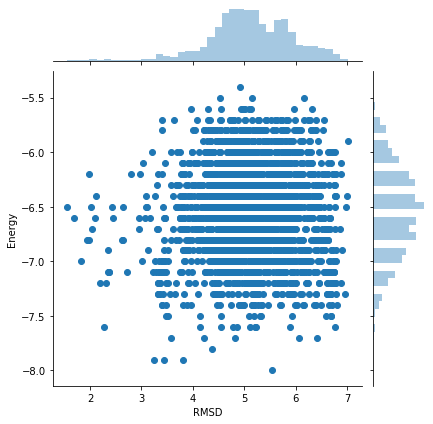

In [4]:
sns.jointplot(data=df,x='RMSD',y='Energy')

In [5]:
# Set docking quality based on RMSD criteria
df['Quality']='bad'
df.loc[df['RMSD'] <=2.5, 'Quality'] = 'medium'
df.loc[df['RMSD'] <=1.5, 'Quality'] = 'good'

#### Existe benefício em correr múltiplas réplicas ?
Os métodos de docking molecular realizam usam métodos de busca estocástico, geralmente combinados com uma otimização final. Nos métodos estocásticos são sorteados números aleatório iniciar e conduzir as buscas, portanto cada experimento é diferente. Os métodos costumam reiniciar a busca várias vezes para vasculhar de forma abrangente o espaço de busca, que precisam se discretizado para ser computacionalmente acessível.

A discretização dos graus de liberdade é necessária para que o problema sejá computacionalmente acessível, por exemplo eu discretizar uma só torção, rodando a cada 1 grau e testar a rotação completa terei 360 graus de rotação então 360 cálculos. Com 2 torções eu tenho a combinação 360 por 360, ou seja 129.600 cálculos, e com 3 torções 46.656.000 cálculos. Olha a explosão combinatória aí gente ! Um jeito simples é reduzir o problema e ao invés de avaliar as torções a cada 1 grau, mudar para 5-10 graus. 

> O espaço de busca são os valores possíveis para os graus de liberdade da molécula, ou seja 3 de translação, 3 de rotação, e mais um para cada uma das ligações químicas passíveis de rotação (torções).


##### Por que precisamos de réplicas? 
Como discutido acima, os métodos de busca são estocásticos, e sorteiam combinações entre os graus de liberdade, ou seja, combinações de <b>ângulos de torção</b>, e valores de rotação e translação ! Mesmo com as repetições internas dos cálculos <i>hardcoded</i> nos programas de docking, dependendo da combinação entre complexidade do problema (número torções), a discretização dos graus de liberdade, e os parâmetros de entrada do programa, o espaço de busca pode ser insuficiente ! <b>Pode ser que ele não contenha a solução do problema ! </b>

Por isso é importante compreender as limitações dos métodos e conhecer os casos em que é necessário enriquecer a busca usando réplicas.

## Como estão as previsões ?
Baseado usando o RMSD como métrica de qualidade, como estão as previsões para o redocking.
Vejamos a distribuição geral do RMSD no gráfico abaixo. Podemos notar que a maior parte das previsões fica longe do resultado esperado < 2.5.


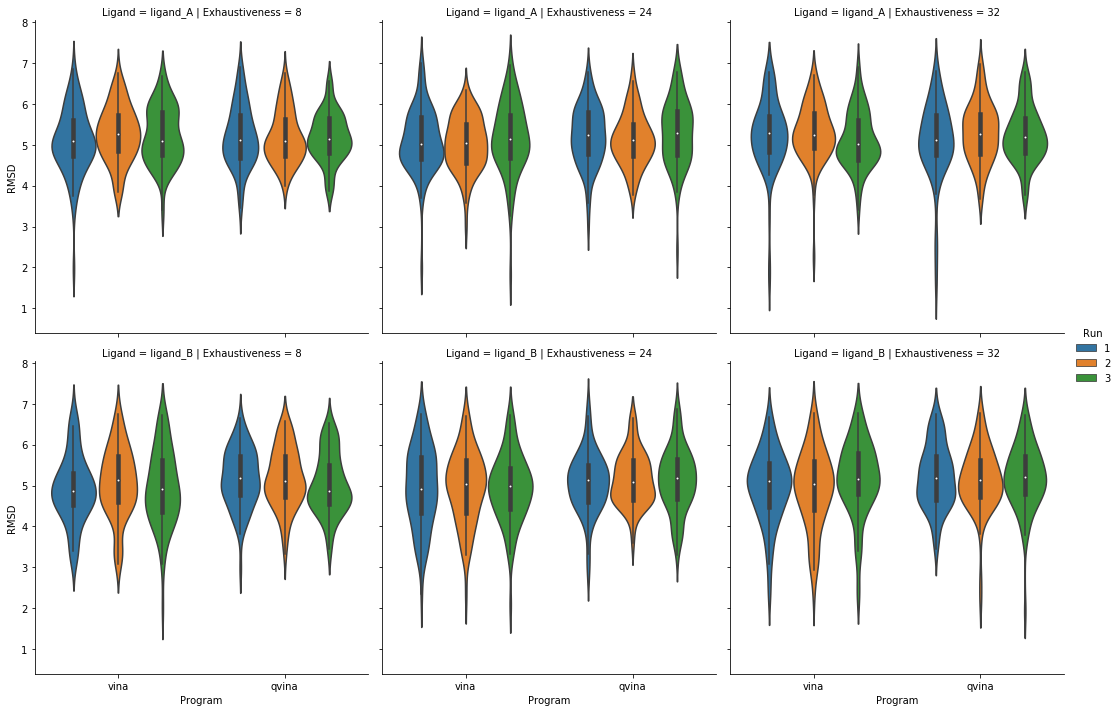

In [6]:
# Vamos ser gerais, qual é o programa que produz os melhores resultados ?
sns.catplot(data=df,
            x='Program',
            y='RMSD',
            hue='Run',
            col='Exhaustiveness',
            col_order=['8','24','32'],
            row='Ligand',
            kind='violin')

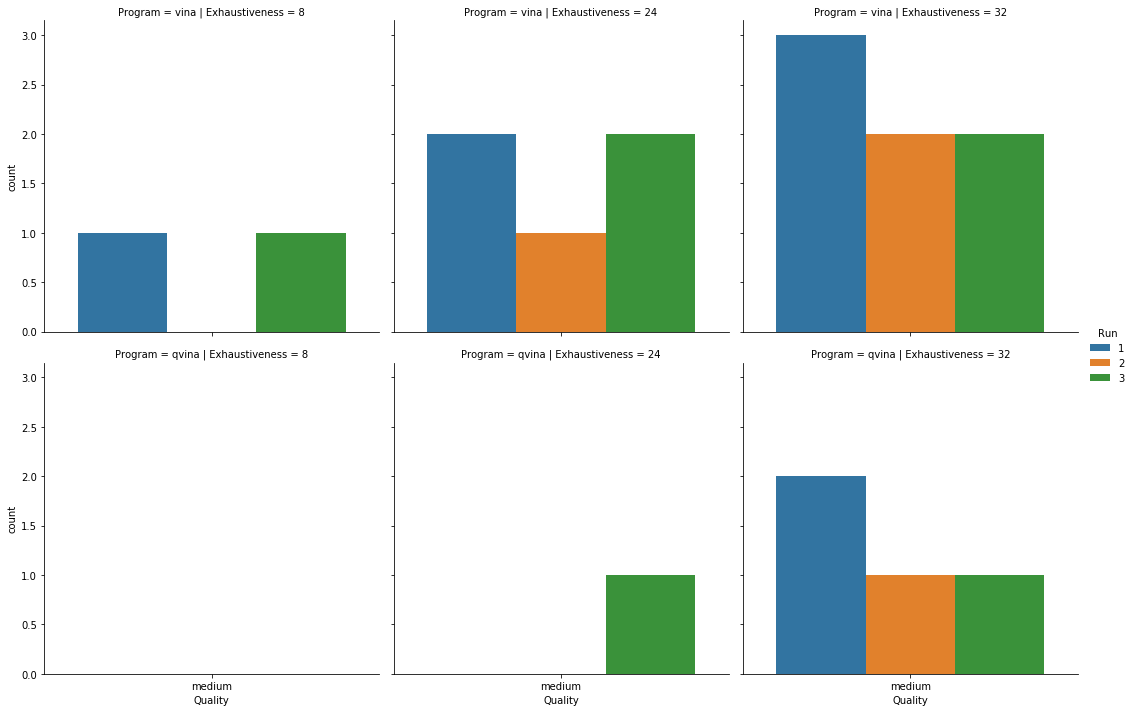

In [7]:
# Qual é a porcentagem geral em cada categoria?
sns.catplot(data=df.query('RMSD < 2.5'),
            x='Quality',
            hue='Run',
            col='Exhaustiveness',
            col_order=['8','24','32'],
            row='Program',
            kind='count')

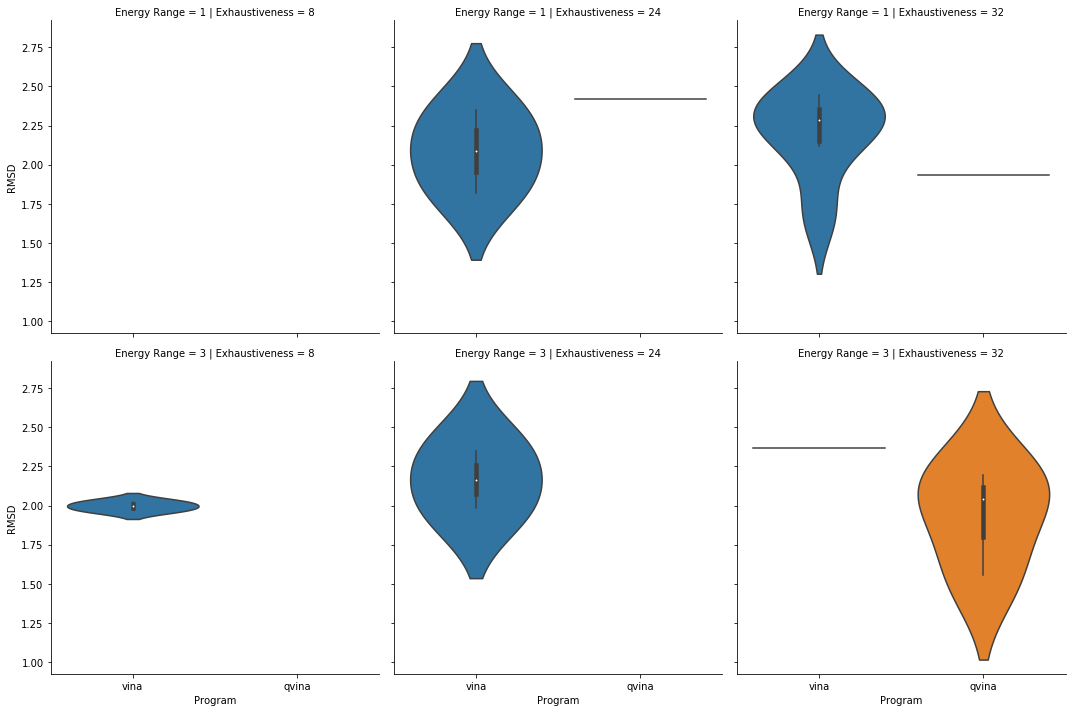

In [8]:
# Qual é a porcentagem geral em cada categoria?
sns.catplot(data=df.query('RMSD < 2.5'),
            y='RMSD',
            col='Exhaustiveness',
            col_order=['8','24','32'],
            row='Energy Range',
            x='Program',
            kind='violin')

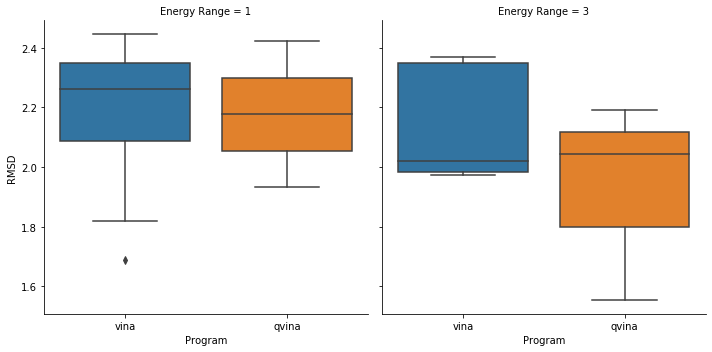

In [9]:
# Qual é a porcentagem geral em cada categoria?
sns.catplot(data=df.query('RMSD < 2.5'),
            y='RMSD',
            col='Energy Range',
            x='Program',
            kind='box')

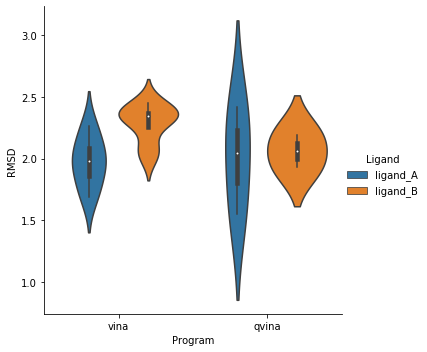

In [10]:
# Tem diferença entre o ligante A e o ligante B.
sns.catplot(data=df.query('RMSD < 2.5'),
            y='RMSD',
            x='Program',
            hue='Ligand',
            kind='violin')

In [11]:
df2=df.query('Program == "vina"').sort_values('RMSD').groupby('ID').head(1)
df2.count()

df2=df.query('Program == "vina" and Exhaustiveness == "8"').sort_values('RMSD').groupby('ID').head(1)
print(df2.query('RMSD < 2.5').count()[0]/df2.count()[0])

df2=df.query('Program == "vina" and Exhaustiveness == "24"').sort_values('RMSD').groupby('ID').head(1)
print(df2.query('RMSD < 2.5').count()[0]/df2.count()[0])

df2=df.query('Program == "vina" and Exhaustiveness == "32"').sort_values('RMSD').groupby('ID').head(1)
print(df2.query('RMSD < 2.5').count()[0]/df2.count()[0])


df2=df.query('Program == "qvina"').sort_values('RMSD').groupby('ID').head(1)
df2.count()

df2=df.query('Program == "qvina" and Exhaustiveness == "8"').sort_values('RMSD').groupby('ID').head(1)
print(df2.query('RMSD < 2.5').count()[0]/df2.count()[0])

df2=df.query('Program == "qvina" and Exhaustiveness == "24"').sort_values('RMSD').groupby('ID').head(1)
print(df2.query('RMSD < 2.5').count()[0]/df2.count()[0])

df2=df.query('Program == "qvina" and Exhaustiveness == "32"').sort_values('RMSD').groupby('ID').head(1)
print(df2.query('RMSD < 2.5').count()[0]/df2.count()[0])

# Tarefa do Caio:
# Fazer um lineplot mostrando o aumento da taxa de sucesso de acordo com a mudança da exhaustividade

0.08333333333333333
0.20833333333333334
0.2916666666666667
0.0
0.041666666666666664
0.16666666666666666


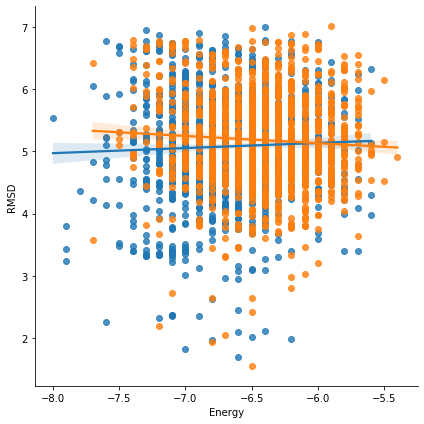

In [12]:
g = sns.FacetGrid(data=df, hue='Program',height=6)
g.map(sns.regplot,'Energy','RMSD')



In [13]:
import scipy.stats

e=df.query('Program == "vina"')['Energy']
r=df.query('Program == "vina"')['RMSD']
pearson_r, p_value1  = scipy.stats.pearsonr(  x=e,y=r)
spearman_r, p_value2 = scipy.stats.spearmanr( a=e,b=r)
r_squared, p_value3  = scipy.stats.linregress(x=e,y=r)[2:4]

print(f'''
Resultados para o Vina
'Pearson-r:',{pearson_r},'| P-value:',{p_value1}
 Spearman-r:',{spearman_r},'| P-value:',{p_value2}
 R^2:',{r_squared},'| P-value:',{p_value3}
''')

e=df.query('Program == "vina"')['Energy']
r=df.query('Program == "vina"')['RMSD']
pearson_r, p_value1  = scipy.stats.pearsonr(  x=df['Energy'],y=df['RMSD'])
spearman_r, p_value2 = scipy.stats.spearmanr( a=df['Energy'],b=df['RMSD'])
r_squared, p_value3  = scipy.stats.linregress(x=df['Energy'],y=df['RMSD'])[2:4]

print(f'''
Resultados para o QuickVina2
'Pearson-r:',{pearson_r},'| P-value:',{p_value1}
 Spearman-r:',{spearman_r},'| P-value:',{p_value2}
 R^2:',{r_squared},'| P-value:',{p_value3}
''')


Resultados para o Vina
'Pearson-r:',0.03972018921054626,'| P-value:',0.14084769280781942
 Spearman-r:',0.018220847688150195,'| P-value:',0.4994632290732617
 R^2:',0.03972018921054625,'| P-value:',0.14084769280770376


Resultados para o QuickVina2
'Pearson-r:',0.013257208573965413,'| P-value:',0.48900859930165014
 Spearman-r:',-0.008873687990821642,'| P-value:',0.6432914543734304
 R^2:',0.013257208573965418,'| P-value:',0.48900859930196205



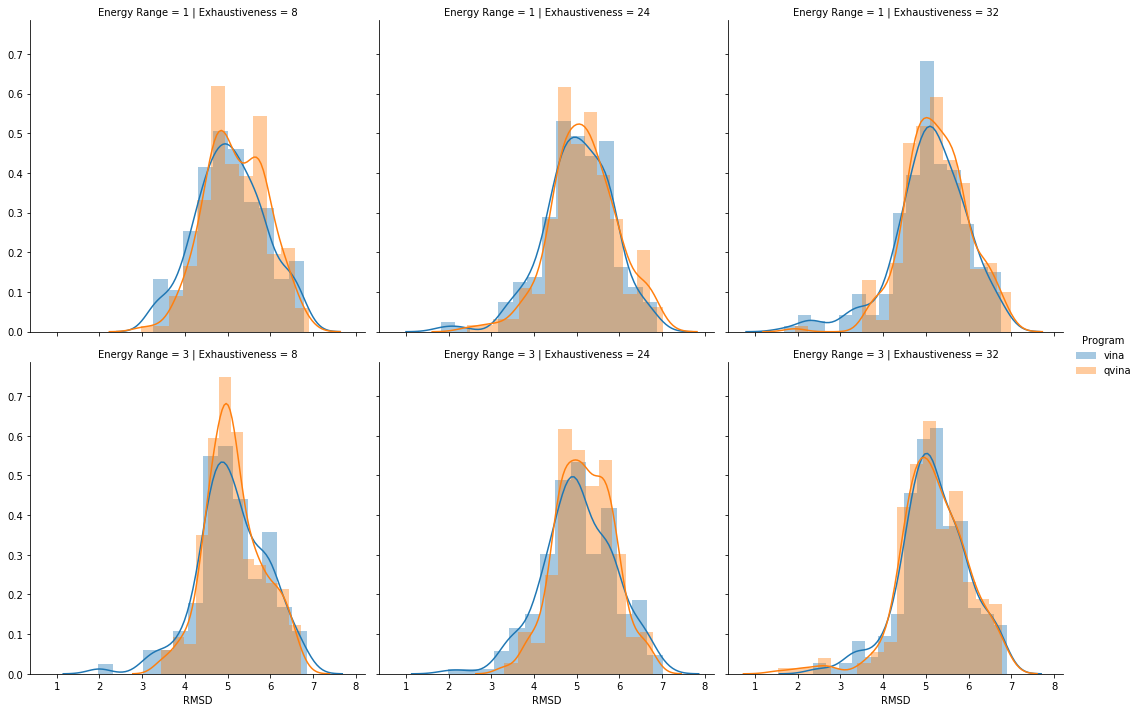

In [14]:
g = sns.FacetGrid(df,hue='Program',col='Exhaustiveness',col_order=['8','24','32'],row='Energy Range',height=5)
g.map(sns.distplot,'RMSD',kde=True).add_legend()

In [15]:
# De todo o experimento, qual foi no MELHOR resultado ?
df.sort_values('RMSD').head(100)

,ID,Program,Ligand,Initial Pose,Pose,Exhaustiveness,Energy Range,Run,Energy,RMSD,Quality
4,87,qvina,ligand_A,crystal,4,32,3,1,-6.5,1.553,medium
9,30,vina,ligand_A,random,9,32,1,1,-6.6,1.687,medium
9,8,vina,ligand_A,crystal,9,24,1,3,-7.0,1.819,medium
3,122,qvina,ligand_B,crystal,3,32,1,3,-6.8,1.933,medium
1,21,vina,ligand_A,random,1,8,3,1,-6.8,1.973,medium
...,...,...,...,...,...,...,...,...,...,...,...
17,120,qvina,ligand_B,crystal,17,32,1,1,-5.7,3.639,bad
0,60,vina,ligand_B,random,0,24,1,1,-7.3,3.653,bad
7,88,qvina,ligand_A,crystal,7,32,3,2,-6.5,3.664,bad
3,134,qvina,ligand_B,random,3,24,1,3,-7.2,3.672,bad


In [16]:
df_exh = df.query('RMSD < 2.5').groupby('Program')['Exhaustiveness'].value_counts(ascending=True)
df_exh.index

MultiIndex([('qvina', '24'),
            ('qvina', '32'),
            ( 'vina',  '8'),
            ( 'vina', '24'),
            ( 'vina', '32')],
           names=['Program', 'Exhaustiveness'])

In [17]:
df_exh = df_exh.reindex(pd.MultiIndex.from_tuples([
            ('qvina', '8'),
            ('qvina', '24'),
            ('qvina', '32'),
            ( 'vina',  '8'),
            ( 'vina', '24'),
            ( 'vina', '32')],
           names=['Program', 'Exhaustiveness']),fill_value=0)
# Incluir número de ocorrências de exaustividade 8 para o programa qvina (zero ocorrências), 
# para melhor visulaização do gráfico.
df_exh

Program  Exhaustiveness
qvina    8                 0
         24                1
         32                4
vina     8                 2
         24                5
         32                7
Name: Exhaustiveness, dtype: int64

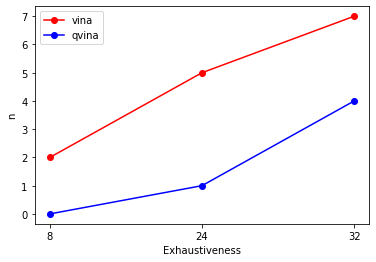

In [18]:
fig, ax = plt.subplots()
plt.plot(df_exh['vina'] .index.to_numpy(),df_exh['vina']. to_numpy(),marker='o',color='red')
plt.plot(df_exh['qvina'].index.to_numpy(),df_exh['qvina'].to_numpy(),marker='o',color='blue')
ax.set_xlabel('Exhaustiveness')
ax.set_ylabel('n')
ax.legend(['vina','qvina'])

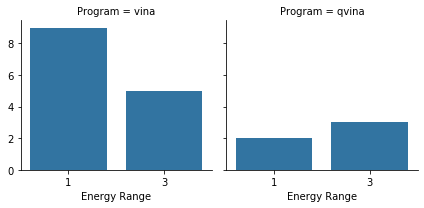

In [9]:
g = sns.FacetGrid(df.query('RMSD < 2.5'),col='Program')
g.map(sns.countplot,'Energy Range')